In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import os
import pickle

In [2]:
# save the model to disk

#Read the file 
car_sales_encoded = pd.read_csv("Resources/car_sales_mpg_encoded.csv")
car_sales_encoded.head()

,Resale-Cat,fuel_type,vehicle_class,trans,drive,smog_rating,city_mpg,hwy_mpg,cmb_mpg,Greenhouse_gas_score,smartway,comb_CO2,Sales_2016,Sales_2017,Sales_2018
0,1,3,0,7,0,5,17.0,25.0,1,4,1,436.0,12071,8731,7909
1,1,3,0,7,0,6,17.0,25.0,1,4,1,436.0,12071,8731,7909
2,1,3,0,7,1,5,16.0,25.0,1,4,1,459.0,12071,8731,7909
3,0,3,2,2,0,6,20.0,27.0,1,5,1,397.0,103217,106583,20848
4,0,3,2,2,0,6,20.0,27.0,1,5,1,397.0,103217,106583,20848


In [3]:
car_sales_encoded['cmb_mpg'].value_counts()

1    100
2     78
0     17
Name: cmb_mpg, dtype: int64

In [4]:
# Sepearate dataset
car_sales_ml = car_sales_encoded.copy()
X = car_sales_ml.drop('cmb_mpg', axis=1)
y = car_sales_ml['cmb_mpg']


In [5]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
### END SOLUTION


In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.980
k: 3, Train/Test Score: 0.993/0.959
k: 5, Train/Test Score: 0.979/0.939
k: 7, Train/Test Score: 0.979/0.939
k: 9, Train/Test Score: 0.973/0.918
k: 11, Train/Test Score: 0.973/0.939
k: 13, Train/Test Score: 0.952/0.980
k: 15, Train/Test Score: 0.959/0.959
k: 17, Train/Test Score: 0.945/0.939
k: 19, Train/Test Score: 0.938/0.918


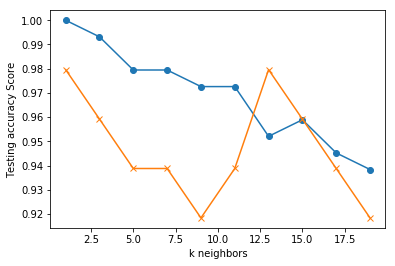

In [8]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [12]:
# Note that k: 15 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.898


In [13]:
# save the model to disk
filename = 'Model/finalized_mpg_model_KN.sav'
pickle.dump(knn, open(filename, 'wb'))

In [14]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))


In [15]:
df = pd.read_csv('Resources/encoded_output.csv')
new_df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)


In [16]:

newX = new_df.drop('cmb_mpg', axis=1)
newy = new_df['cmb_mpg']
print(newy)

0    1
1    2
2    2
3    0
4    2
Name: cmb_mpg, dtype: int64


In [17]:
# Encode the dependent variable
encoder = LabelEncoder()
encoder.fit(newy)
print(newX)

   Resale-Cat  fuel_type  vehicle_class  trans  drive  smog_rating  city_mpg  \
0           1          1              0      3      1            6      16.0   
1           1          1              3      2      0            6      28.0   
2           0          1              2      1      1            5      23.0   
3           1          0              1      0      0           10     125.0   
4           1          2              0      3      1            3      43.5   

   hwy_mpg  Greenhouse_gas_score  smartway  comb_CO2  Sales_2016  Sales_2017  \
0     25.0                     4         1       459       12071        8731   
1     34.0                     7         2       295       14380       11467   
2     25.0                     5         1       375      180991      179188   
3    100.0                    10         0         0       13251       10458   
4     48.5                     9         2       214       12071        8731   

   Sales_2018  
0        7909  
1     

In [18]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(newX, newy)

In [19]:
print(result)

0.6


In [20]:
ynew = loaded_model.predict(newX)

In [21]:
print (ynew)

[2 2 1 0 2]
